In [1]:
import numpy as np
import pandas as pd
import h5py
import pysam
import os
from modisco.visualization import viz_sequence
from modisco import util
from matplotlib import pyplot as plt
import pybedtools

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
dttype = 'dnase'
mode = 'profile'
#modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
#ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'
modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'

background=[0.25, 0.25, 0.25, 0.25]

# Functions

In [3]:
def _plot_weights(array,
                  figsize=(10,3),
                 **kwargs):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    viz_sequence.plot_weights_given_ax(ax=ax, array=array,**kwargs)
    plt.show()
    plt.close()

# Fetch PPMs

metacluster_0
pattern_0


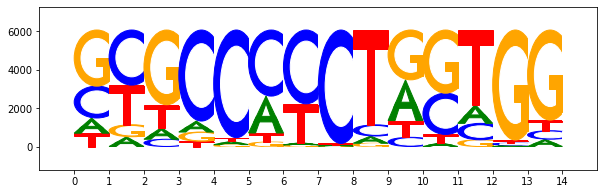

pattern_1


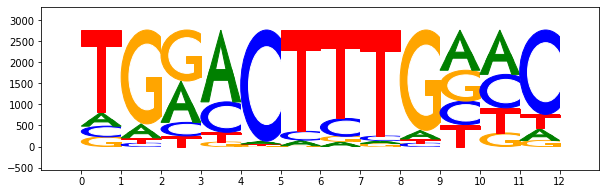

pattern_2


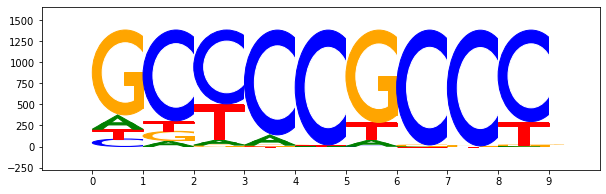

pattern_3


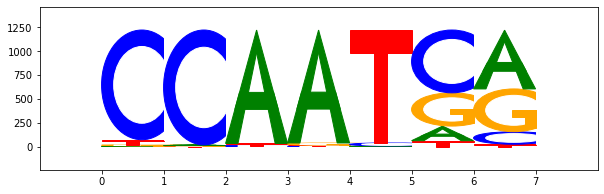

pattern_4


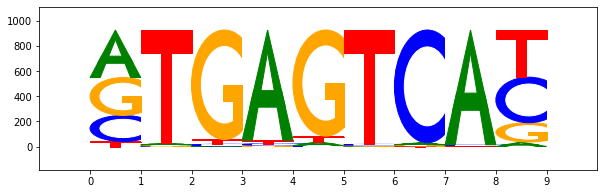

pattern_5


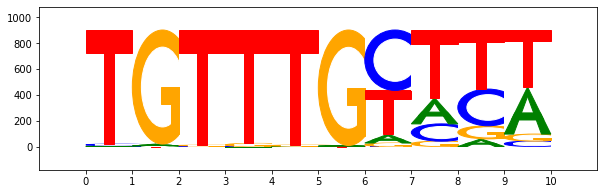

pattern_6


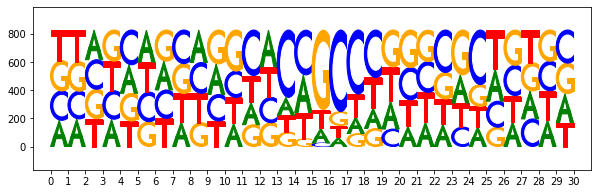

pattern_7


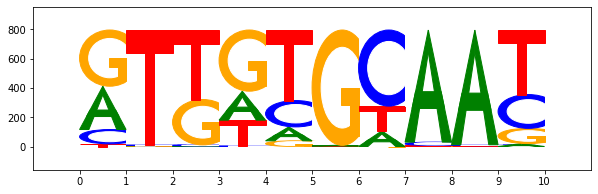

pattern_8


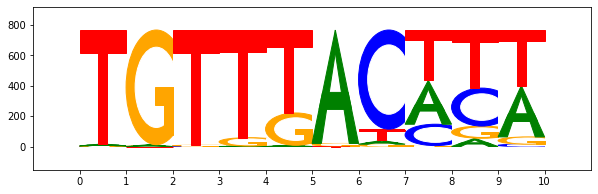

pattern_9


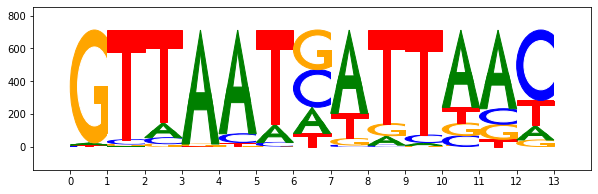

pattern_10


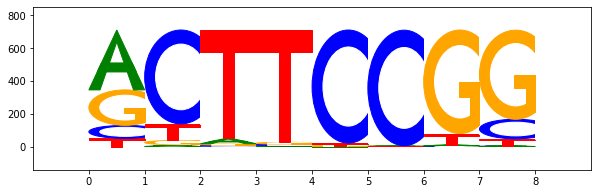

pattern_11


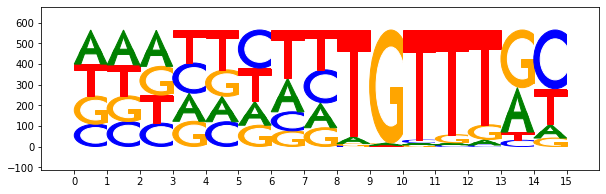

pattern_12


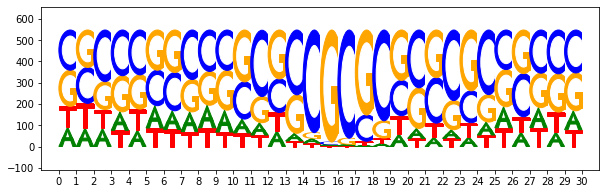

pattern_13


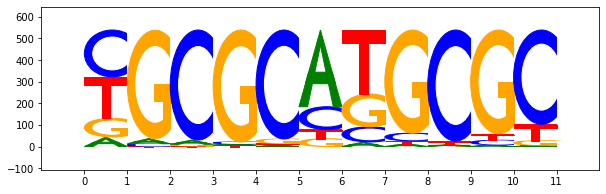

pattern_14


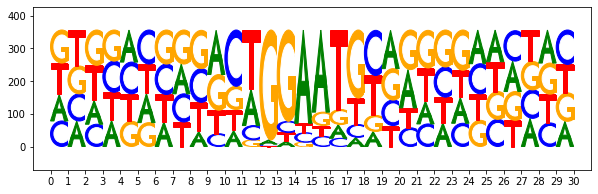

pattern_15


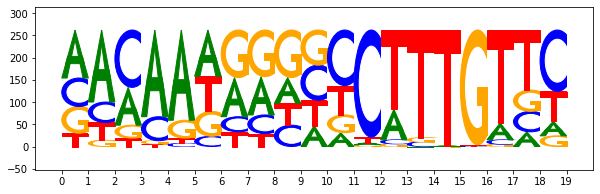

pattern_16


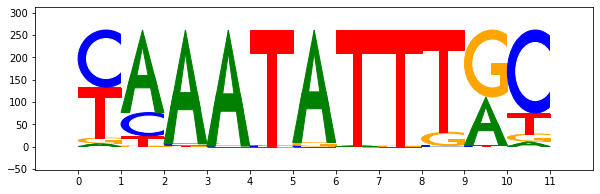

pattern_17


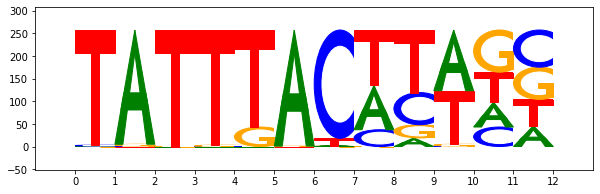

pattern_18


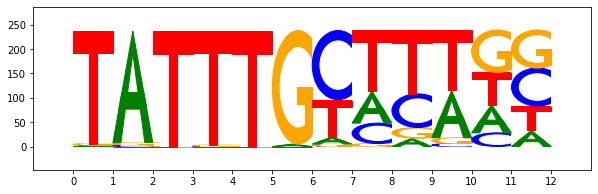

pattern_19


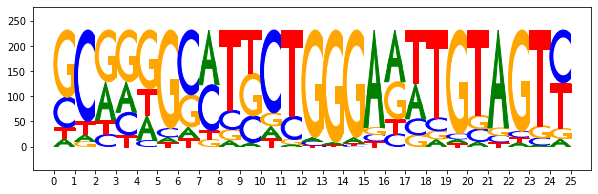

pattern_20


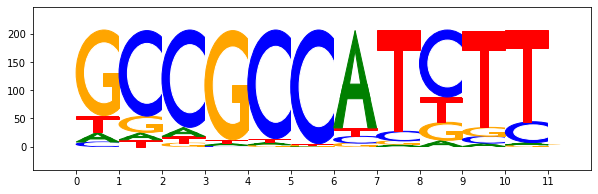

pattern_21


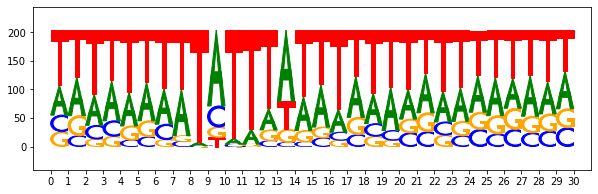

pattern_22


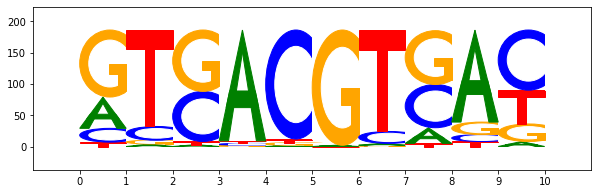

pattern_23


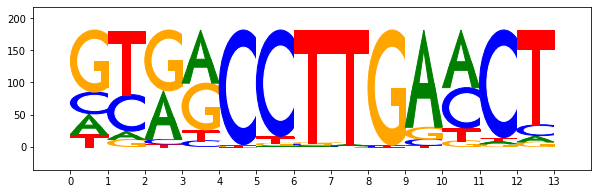

pattern_24


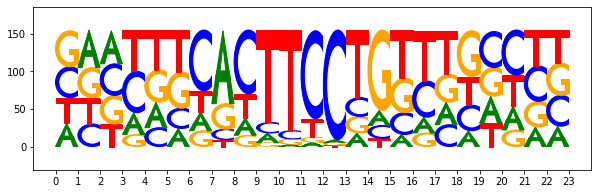

pattern_25


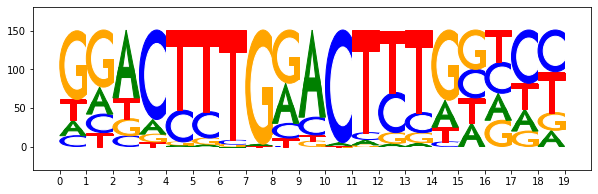

pattern_26


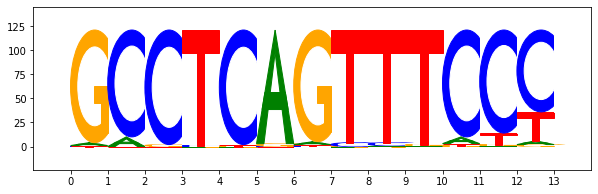

pattern_27


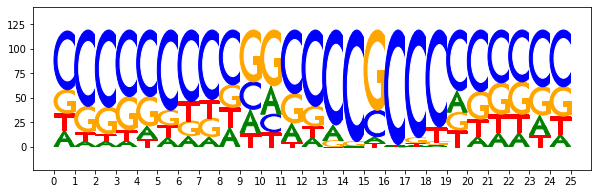

pattern_28


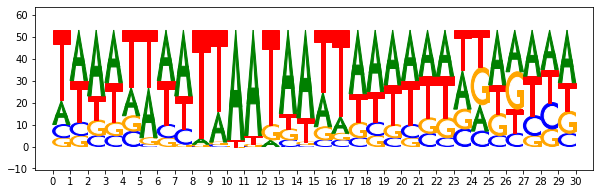

pattern_29


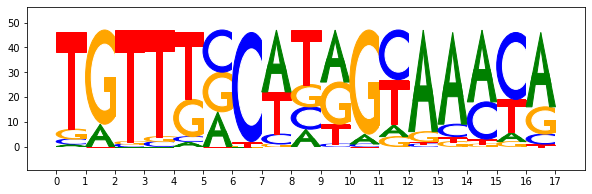

pattern_30


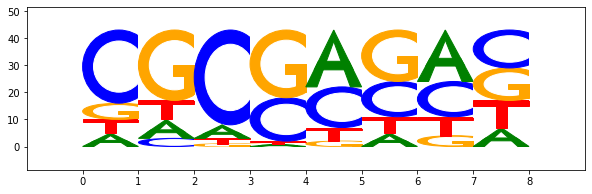

pattern_31


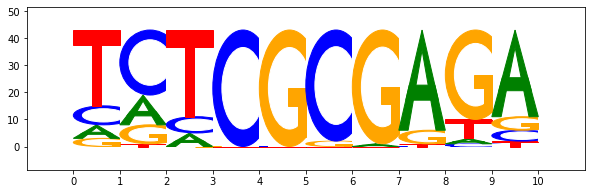

pattern_32


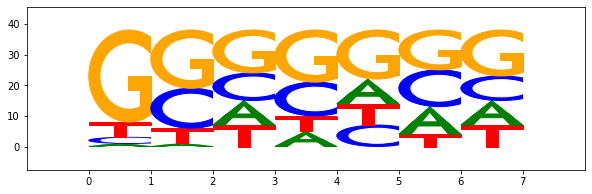

pattern_33


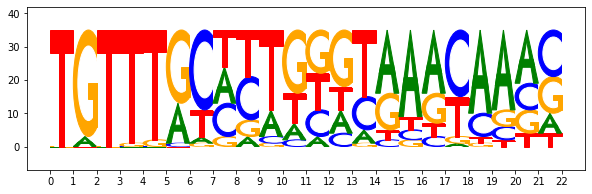

pattern_34


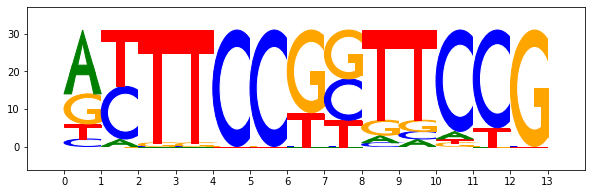

pattern_35


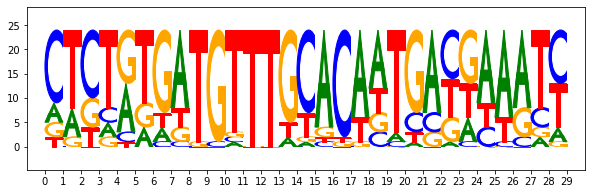

pattern_36


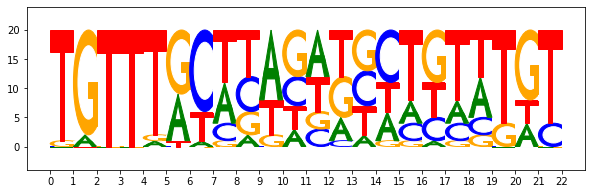

pattern_37


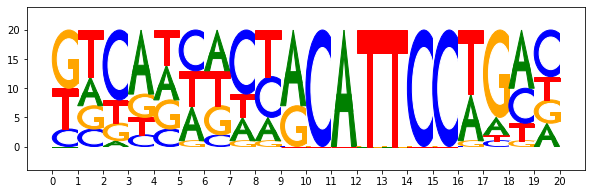

metacluster_1
pattern_0


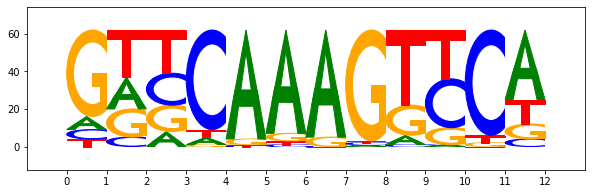

pattern_1


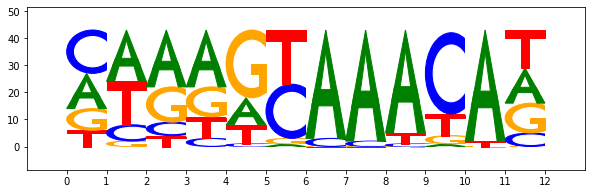

pattern_2


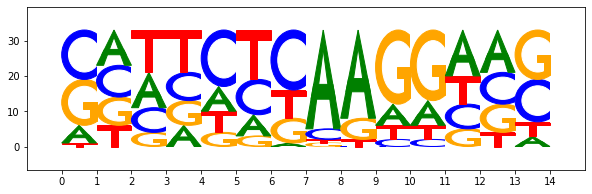

pattern_3


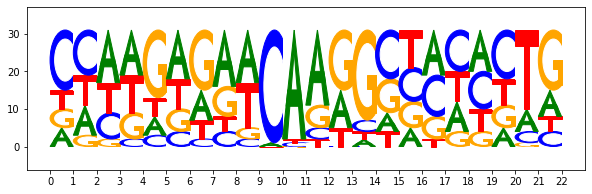

In [4]:
modisco_results = h5py.File(modisco_path, 'r')

for metacluster_name in modisco_results["metacluster_idx_to_submetacluster_results"]:
    print(metacluster_name)

    metacluster = modisco_results["metacluster_idx_to_submetacluster_results"][metacluster_name]
    all_pattern_names = [x.decode("utf-8") for x in list(metacluster["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

    for pattern_name in all_pattern_names:
        print(pattern_name)

        ppm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['sequence']['fwd'])
        cwm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]["task0_contrib_scores"]['fwd'])
        num_seqlets = len(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['seqlets_and_alnmts']['seqlets'])

        
        score = np.sum(np.abs(cwm), axis=1)
        trim_thresh = np.max(score) * 0.25  # Cut off anything less than 30% of max score
        pass_inds = np.where(score >= trim_thresh)[0]
        trimmed = ppm[np.min(pass_inds): np.max(pass_inds) + 1]
        pfm = trimmed * num_seqlets
        pfm = pfm.astype(int)
                
        _plot_weights(pfm.transpose())
        

        np.savetxt(ppm_dir  + '/'  + mode + '/' + metacluster_name + '.' + pattern_name + '.pfm.fwd.txt', pfm.transpose().astype(int), fmt='%i')
